In [1]:
import statsmodels.api as sm
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure

In [ ]:
# arparams = np.array([1, -0.9])
# maparams = np.array([])
# ar = np.r_[1, -arparams]
# ma = np.r_[1, maparams]
# y = sm.tsa.arma_generate_sample(ar, ma, 200)

# figure(figsize=(15, 6))
# plt.plot(y, color="magenta")

In [2]:
import numpy as np
from statsmodels.tsa.stattools import pacf

with open('C:/Users/sutob/Desktop/multi_line_text_file.txt', 'r') as file:
    lines = file.readlines()

numeric_lines = [list(map(float, line.split())) for line in lines]
matrix_array = np.array(numeric_lines)

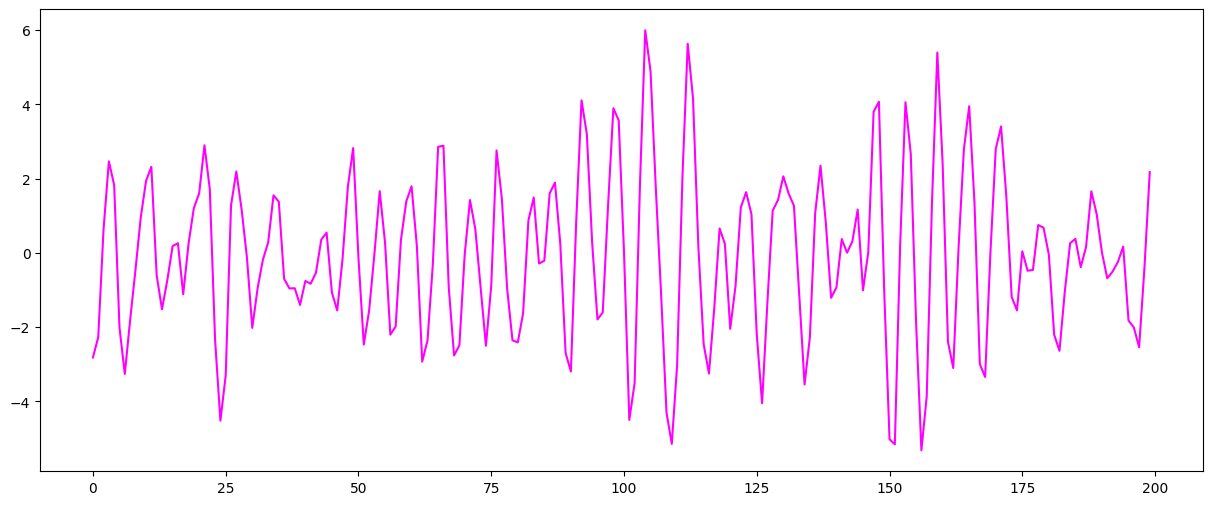

In [3]:
pacf(matrix_array,nlags=2)
figure(figsize=(15, 6))
plt.plot(matrix_array, color="magenta")

In [4]:
def durbin_levinson(time_series, order):
    sample_autocov = sample_moments(time_series, order + 1)
    phi = np.zeros((order, order))
    variances = np.zeros(order)
    phi[0, 0] = sample_autocov[1] / sample_autocov[0]
    variances[0] = sample_autocov[0] * (1 - phi[0, 0]**2)
    
    for i in range(1, order):
        temp_var = sample_autocov[i+1] - sum([phi[i-1, j] * sample_autocov[i-j] for j in range(i)])
        phi[i, i] = temp_var / variances[i-1]
        for j in range(i):
            phi[i, j] = phi[i-1, j] - phi[i, i] * phi[i-1, i-j-1]
        variances[i] = variances[i-1] * (1 - phi[i, i]**2)
    
    return phi


In [5]:
def sample_moments(time_series, max_lag):
    n_samples = len(time_series)
    mean_val = np.mean(time_series)
    autocovs = [np.sum((time_series[:n_samples-lag] - mean_val) * (time_series[lag:] - mean_val)) / n_samples for lag in range(max_lag + 1)]
    
    return autocovs

In [6]:
durbin_levinson(matrix_array, order=2)

array([[ 0.51660161,  0.        ],
       [ 0.9479924 , -0.83505505]])

In [5]:
from statsmodels.tsa.stattools import pacf
pacf(matrix_array,nlags=2, method = 'ldb')

array([ 1.        ,  0.51660161, -0.83505505])